# Where do US marathon runners live? 

Pitch: Recent attempts by Nike to 'perfect' the marathon put attention on the great feat of long-distance running. While elite marathon runners are considered some of the best athletes in the world, recreational marathon running has grown exponentially in the past decade (with well over half a million finishers in the United States last year). 

The biggest marathons in the US - Boston, Chicago and LA, bring runners from around the world to compete for prize money or just the chance to run on historic routes. For the project, I want to explore where runners with the US come from...and how far are they willing to travel to compete in some of the most well-known races. 

With this, I hope to answer questions such as: 
* What city holds the most amount of traveling runners? (as in people who don't live in the LA area travel to LA)
* What is the average distance traveled? 

Possible tite: 
* In the biggest US marathons, runners travel XXX miles to compete
* Traveling for races becomes a new part of running culture 

In [1]:
import pandas as pd
import requests
import geopandas as gpd
%matplotlib inline
import re
import numpy

Step One: Read in slightly cleaned up CSV files of finishers (5,000 men and 5,000 women)

In [2]:
#Chicago Men
df_chicagomen = pd.read_csv('ChicagoMarathonMen.csv')
df_chicagomen.dropna(inplace=True)
df_chicagomen.head()
df_chicagomen_us = df_chicagomen.loc[df_chicagomen['Name'].str.contains("USA")]
df_chicagomen_us = df_chicagomen_us.loc[df_chicagomen_us['State'].str.contains(r'^\w\w$', na=False)]
#df_chicagomen_us.head()


In [367]:
df_chicagomen

,Name,Age,Total Time,City,State,Gender
7,"» Estrada, Diego (USA)",26.0,2:13:56,Flagstaff,AZ,M
9,"» Kibet, Elkanah (USA)",30.0,2:16:37,Fountain,CO,M
10,"» Young, Tim (USA)",29.0,2:16:43,Fredericksburg,VA,M
11,"» Epperson, Andrew (USA)",25.0,2:16:54,Golden,CO,M
14,"» Migliozzi, Tony (USA)",27.0,2:19:39,North Canton,OH,M
18,"» Puskedra, Luke (USA)",26.0,2:20:18,Eugene,OR,M
19,"» Mott, Jonathan (USA)",29.0,2:20:22,Babson Park,FL,M
21,"» Chu, Meng-Tsung (TPE)",34.0,2:21:02,Colorado Springs,CO,M
22,"» Dandena, Kiya (USA)",27.0,2:22:14,Flagstaff,AZ,M
23,"» Carrera, Mizael (USA)",25.0,2:22:25,Chicago,IL,M


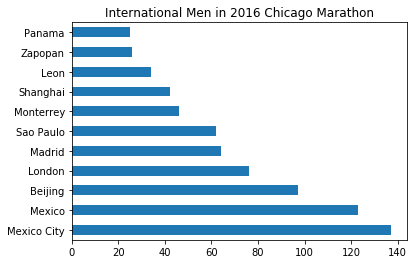

In [542]:

df_chicagomen_int = df_chicagomen.loc[df_chicagomen['State'].str.contains(r'^\w\w\w.*', na=False)]
df_chicagomen_int = df_chicagomen_int.drop(df_chicagomen_int.index[[15]])
df_chicagomen_int['City'].value_counts().head(11).plot(kind='barh',title='International Men in 2016 Chicago Marathon')
plt.savefig("International_Men_Chicago_True2.pdf") 

In [444]:
df_chicagomen_int['Age'].mean()

41.407100591715974

In [3]:
#Chicago Men US finishers = 152134


In [409]:
#df_chicagomen.shape
#20,330 total male finishers 


In [7]:
df_nycinchicago = df_chicagomen_us[df_chicagomen_us['State'] == 'NY']
df_nycinchicago['Age'].median() 


36.0

In [8]:
df_cainchicagomen = df_chicagomen_us[df_chicagomen_us['State'] == 'CA']
df_cainchicagomen['Age'].median()

39.0

In [9]:
df_ininchicagomen = df_chicagomen_us[df_chicagomen_us['State'] == 'IN']
df_ininchicagomen['Age'].median()

40.0

In [10]:
df_ilinchicago = df_chicagomen_us[df_chicagomen_us['State'] == 'IL']
df_ilinchicago['Age'].median()

37.0

In [11]:
df_cainchicagomen = df_chicagomen_us[df_chicagomen_us['State'] == 'TX']
df_cainchicagomen['Age'].median()

42.0

In [12]:
df_cainchicagomen = df_chicagomen_us[df_chicagomen_us['State'] == 'MA']
df_cainchicagomen['Age'].median()

36.0

In [13]:
df_chicagomen_us['City'].value_counts().head(2)


Chicago     3540
New York     235
Name: City, dtype: int64

Women of the Chicago Marathon

In [14]:
df_chicagowomen = pd.read_csv("ChicagoMarathonWomen.csv")
df_chicagowomen.shape

(18000, 6)

In [15]:
#18000 total female runners in the Chicago Marathon 

In [16]:
df_chicagowomen.dropna(inplace=True)
df_chicagowomen.columns = ['Name', 'City', 'State', 'Age', 'Total Time', 'Gender']
df_chicagowomen_us = df_chicagowomen.loc[df_chicagowomen['Name'].str.contains('USA')]
df_chicagowomen_us.shape
#14876 women from US in the Chicago marathon 

(14876, 6)

In [562]:
df_chicagowomen_int['Age'].mean()

38.531531531531535

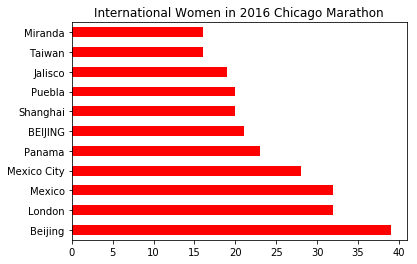

In [543]:
df_chicagowomen_int = df_chicagowomen.loc[df_chicagowomen['State'].str.contains(r'^\w\w\w.*', na=False)]
df_chicagowomen_int
df_chicagowomen_int['State'].value_counts().head(11).plot(color='red',kind='barh',title='International Women in 2016 Chicago Marathon')
plt.savefig("International_Women_Chicago_True.pdf") 


In [445]:
df_chicagowomen_int['Age'].mean()

38.531531531531535

In [454]:
df_chicagowomen_int.columns

Index(['Name', 'City', 'State', 'Age', 'Total Time', 'Gender'], dtype='object')

In [422]:
#df_chicagowomen_us['State'].value_counts().head(2)

In [423]:
#df_chicagowomen_us['City'].value_counts().head(2)


Boston Marathon

In [20]:
df_boston = pd.read_csv('BostonMarathon.csv')
df_boston.head()
df_boston.shape
#26410 total runners 

(26410, 6)

In [21]:
df_boston_us = df_boston.dropna()
df_boston_us.columns


Index(['Name', 'Country', 'City', 'State', 'M/F', 'Official Time'], dtype='object')

In [22]:
df_boston_us['M/F'].value_counts()


M    11843
F    10972
Name: M/F, dtype: int64

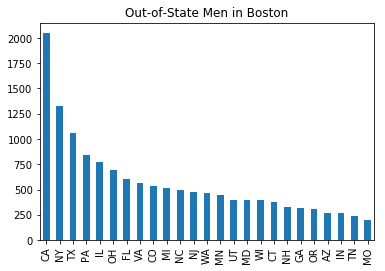

In [567]:
df_boston_men = df_boston_us[df_boston_us['M/F'] == 'M']
df_boston_men['Country'].value_counts()
df_bostonustrue = df_boston[df_boston['Country'] == 'USA']
df_bostonustrue = df_bostonustrue[df_bostonustrue['State'] != 'MA']
df_bostonustrue['State'].value_counts()
df_bostonustrue['State'].value_counts().head(25).plot(kind='bar', title = 'Out-of-State Men in Boston')


Index(['Name', 'Country', 'City', 'State', 'M/F', 'Official Time'], dtype='object')

In [604]:
df_boston_women = df_boston_us[df_boston_us['M/F'] == 'F']
df_boston_women['Country'].value_counts()
df_boston_women.columns

Index(['Name', 'Country', 'City', 'State', 'M/F', 'Official Time'], dtype='object')

In [25]:
df_bostonus_men = df_boston_men[df_boston_men['Country'] == 'USA']
#df_bostonus_men['State'].value_counts()

In [568]:
df_bostonwomen = df_boston_us[df_boston_us['M/F'] == 'F']
df_bostonuswomentrue = df_bostonwomen[df_bostonwomen['Country'] == 'USA']
df_bostonuswomentrue = df_bostonuswomentrue[df_bostonuswomentrue['State'] != 'MA']
df_bostonuswomentrue['State'].value_counts()

#df_bostonuswomentrue['State'].value_counts().head(25).plot(kind='bar', title = 'Out-of-State Women in Boston', color='red')

CA    952
NY    641
TX    493
PA    390
IL    353
OH    311
FL    294
VA    281
CO    252
WA    247
UT    246
NC    232
MN    219
NJ    217
MI    208
MD    197
WI    185
CT    160
NH    158
OR    154
GA    145
AZ    127
TN    114
IN    107
MO    100
DC     76
ME     75
SC     61
RI     58
IA     52
KY     48
NV     46
ID     46
KS     43
VT     38
NE     36
AL     36
LA     35
OK     34
NM     29
AR     26
HI     21
DE     21
AK     21
MT     20
SD     17
WV     15
MS     15
ND     14
WY     10
PR     10
AE      2
VI      1
AP      1
Name: State, dtype: int64

In [26]:
df_bostonus_men = df_boston_men[df_boston_men['Country'] == 'USA']
#df_bostonus_men['City'].value_counts()

In [28]:
df_bostonus_women = df_boston_women[df_boston_women['Country'] == 'USA']
#df_bostonus_women['State'].value_counts()

In [29]:
#df_bostonus_women['City'].value_counts()

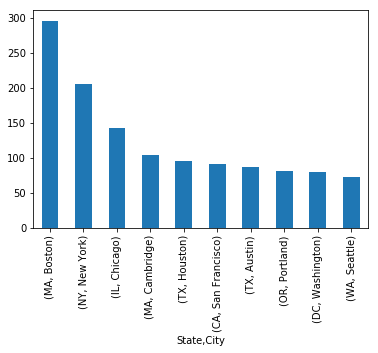

In [502]:
df_bostonus_men.groupby('State')['City'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

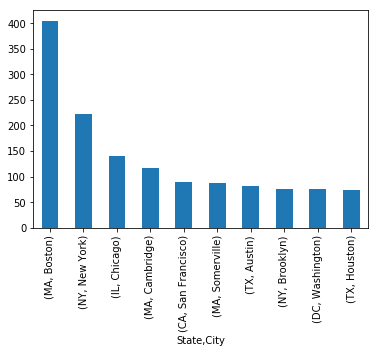

In [503]:
df_bostonus_women.groupby('State')['City'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

LA Marathon finishers - Women 

In [30]:
df_LAwomen = pd.read_csv('LAMarathonWomen.csv')
df_LAwomen.head()
df_LAwomen.shape

(7289, 6)

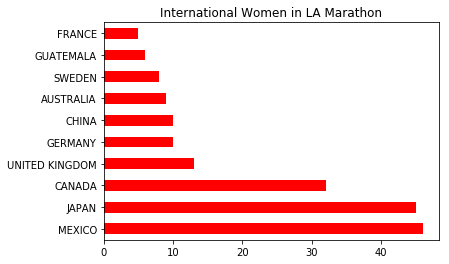

In [507]:
df_LAwomen_int = df_LAwomen.loc[df_LAwomen['State'].str.contains(r'^\w\w\w.*', na=False)]
df_LAwomen_int['State'].value_counts(ascending=False).head(10).plot(kind='barh', title='International Women in LA Marathon', color='red')
plt.savefig("International_Women_LA_True.pdf") 

In [561]:
df_LAwomen_int['Age'].mean()

38.646586345381529

In [433]:
df_LAwomen_us = df_LAwomen.loc[df_LAwomen['State'].str.contains(r'^\w\w$', na=False)]
df_LAwomen_us['State'].value_counts()


CA    6426
NY      68
TX      59
CO      45
IL      37
OR      32
WA      30
AZ      28
NV      24
MA      24
FL      20
NJ      16
OH      15
PA      15
UT      12
VA      11
GA      11
IN      10
ID       9
MN       9
MD       8
NC       8
HI       8
WI       7
DC       7
CT       7
MI       7
IA       7
NM       5
OK       5
MO       5
KS       4
AR       4
SC       4
NE       3
NH       3
KY       2
ME       2
AL       2
WY       2
MT       2
DE       2
LA       2
WV       1
TN       1
ND       1
US       1
VT       1
AK       1
Name: State, dtype: int64

In [33]:
df_LAwomen_us['City'].value_counts().head(2)

LOS ANGELES     1589
SANTA MONICA     142
Name: City, dtype: int64

LA Marathon Men

In [34]:
df_la_men = pd.read_csv('LAMarathonMen.csv')
df_la_men.dtypes
df_la_men['State'].astype(str)
df_la_men.head(2)

,Name,Age,Total Time,City,State,Gender
0,SCOTT CHOW,19,2:49:36,SANTA BARBARA,CA,M
1,AUSTIN JANISCH,19,2:57:56,PASADENA,CA,M


In [35]:
#df_la_men['State'].value_counts()

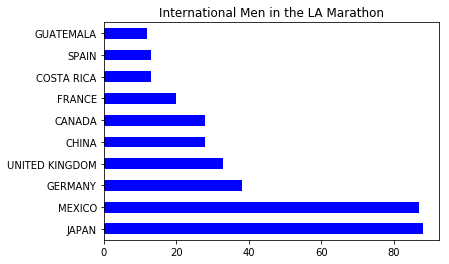

In [508]:
df_LAmen_int = df_la_men.loc[df_la_men['State'].str.contains(r'^\w\w\w.*', na=False)]
df_LAmen_int['State'].value_counts().head(10).plot(kind='barh', title='International Men in the LA Marathon', color='blue')
plt.savefig("International_Men_LA_True.pdf") 

In [511]:
Japan_LA_Men = df_LAmen_int[df_LAmen_int['State'] == 'JAPAN']
Japan_LA_Men['Age'].mean()


42.613636363636367

In [512]:
Japan_LA_Women = df_LAwomen_int[df_LAwomen_int['State'] == 'JAPAN']
Japan_LA_Women['Age'].mean()

39.93333333333333

In [514]:
Mexico_LA_Men = df_LAmen_int[df_LAmen_int['State'] == 'MEXICO']
Mexico_LA_Men['Age'].mean()

40.850574712643677

In [516]:
Mexico_LA_Women = df_LAwomen_int[df_LAwomen_int['State'] == 'MEXICO']
Mexico_LA_Women['Age'].mean()

39.369565217391305

In [518]:
Germany_LA_Women = df_LAwomen_int[df_LAwomen_int['State'] == 'GERMANY']
Germany_LA_Women['Age'].mean()

34.0

In [519]:
Germany_LA_men = df_LAmen_int[df_LAmen_int['State'] == 'GERMANY']
Germany_LA_men['Age'].mean()

45.184210526315788

In [560]:
df_LAmen_int['Age'].mean()

42.076620825147344

Reading in finishers 

In [186]:
df1 = pd.read_csv('finishers_by_state/finishers_by_state - boston_men (1).csv')
df1.head()

,State,boston_men
0,AK,31
1,AL,44
2,AR,30
3,AZ,143
4,CA,1097


In [187]:
df2 = pd.read_csv('finishers_by_state/finishers_by_state - boston_women (1).csv')
df2.head()

,State,boston_women
0,AK,21
1,AL,36
2,AR,26
3,AZ,127
4,CA,952


In [188]:
boston = df1.merge(df2, on='State', how='outer')
boston.head()

,State,boston_men,boston_women
0,AK,31,21
1,AL,44,36
2,AR,30,26
3,AZ,143,127
4,CA,1097,952


In [189]:
df3 = pd.read_csv('finishers_by_state/finishers_by_state - chicago_men (2).csv')

In [190]:
df4 = pd.read_csv('finishers_by_state/finishers_by_state - chicago_women (1).csv')

In [191]:
chicago = df4.merge(df3, on = 'State', how='outer')
chicago.head()
#chicago['chicago_women'].sum()

,State,chicago_women,Chicago_Men
0,AK,20.0,10.0
1,AL,63.0,42.0
2,AR,38.0,38.0
3,AZ,69.0,75.0
4,CA,709.0,658.0


In [192]:
df5 = pd.read_csv('finishers_by_state/finishers_by_state - la_men (1).csv')

In [193]:
df6 = pd.read_csv('finishers_by_state/finishers_by_state - la_women (1).csv')

In [194]:
la = df5.merge(df6, on='State', how='outer')
new_df = la.merge(boston, on='State')

In [195]:
total_finishers = new_df.merge(chicago, on='State', how='outer')


In [196]:
#This will be my introductory map to the project 
total_finishers.fillna("0", inplace=True)
all_finishers = total_finishers[total_finishers['State'] != 'PR']
#all_finishers = all_finishers.reset_index()
all_finishers

,State,la_men,la_women,boston_men,boston_women,chicago_women,Chicago_Men
0,AK,5,1,31,21,20,10
1,AL,2,2,44,36,63,42
2,AR,3,4,30,26,38,38
3,AZ,46,28,143,127,69,75
4,CA,8846,6426,1097,952,709,658
5,CO,34,45,282,252,255,185
6,CT,9,7,217,160,95,86
7,DC,17,7,80,76,117,96
8,DE,1,2,26,21,11,4
9,FL,39,20,315,294,458,372


In [197]:
for column in all_finishers.columns[1:]:
    all_finishers[column] = all_finishers[column].astype(int)
    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [198]:
#all_finishers['Total'] = all_finishers['la_men'] + all_finishers['la_women'] + all_finishers['boston_men'] + all_finishers['boston_women'] + all_finishers['chicago_women'] + all_finishers['Chicago_Men']
#all_finishers['Total'] = all_finishers.sum(axis=1)
for column in all_finishers.columns:
    print(column,)
    print(all_finishers[column].apply(lambda x: type(x)).unique())

State
[<class 'str'>]
la_men
[<class 'int'>]
la_women
[<class 'int'>]
boston_men
[<class 'int'>]
boston_women
[<class 'int'>]
chicago_women
[<class 'int'>]
Chicago_Men
[<class 'int'>]


In [335]:
all_finishers['Total'] = all_finishers['la_men'] + all_finishers['la_women'] + all_finishers['boston_men'] + all_finishers['boston_women'] + all_finishers['chicago_women'] + all_finishers['Chicago_Men']
all_finishers['Total_Women'] = all_finishers['la_women'] + all_finishers['boston_women'] + all_finishers['chicago_women'] 
all_finishers['Total_Men'] = all_finishers['la_men'] + all_finishers['boston_men'] + all_finishers['Chicago_Men'] 
all_finishers['Total_LA'] = all_finishers['la_men'] + all_finishers['la_women']
all_finishers['Total_CHI'] = all_finishers['Chicago_Men'] + all_finishers['chicago_women']
all_finishers['Total_BOS'] = all_finishers['boston_women'] + all_finishers['boston_men']

all_finishers

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,State,la_men,la_women,boston_men,boston_women,chicago_women,Chicago_Men,Total,Total_Women,Total_Men,Total_LA,Total_CHI,Total_BOS
0,AK,5,1,31,21,20,10,88,42,46,6,30,52
1,AL,2,2,44,36,63,42,189,101,88,4,105,80
2,AR,3,4,30,26,38,38,139,68,71,7,76,56
3,AZ,46,28,143,127,69,75,488,224,264,74,144,270
4,CA,8846,6426,1097,952,709,658,18688,8087,10601,15272,1367,2049
5,CO,34,45,282,252,255,185,1053,552,501,79,440,534
6,CT,9,7,217,160,95,86,574,262,312,16,181,377
7,DC,17,7,80,76,117,96,393,200,193,24,213,156
8,DE,1,2,26,21,11,4,65,34,31,3,15,47
9,FL,39,20,315,294,458,372,1498,772,726,59,830,609


In [582]:
all_finishers

,State,la_men,la_women,boston_men,boston_women,chicago_women,Chicago_Men,Total,Total_Women,Total_Men,Total_LA,Total_CHI,Total_BOS
0,AK,5,1,31,21,20,10,88,42,46,6,30,52
1,AL,2,2,44,36,63,42,189,101,88,4,105,80
2,AR,3,4,30,26,38,38,139,68,71,7,76,56
3,AZ,46,28,143,127,69,75,488,224,264,74,144,270
4,CA,8846,6426,1097,952,709,658,18688,8087,10601,15272,1367,2049
5,CO,34,45,282,252,255,185,1053,552,501,79,440,534
6,CT,9,7,217,160,95,86,574,262,312,16,181,377
7,DC,17,7,80,76,117,96,393,200,193,24,213,156
8,DE,1,2,26,21,11,4,65,34,31,3,15,47
9,FL,39,20,315,294,458,372,1498,772,726,59,830,609


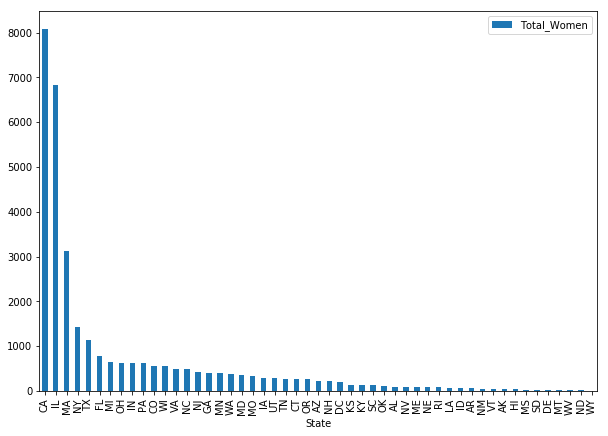

In [209]:
all_finishers.sort_values(by='Total_Women', ascending=False).plot(x='State', y='Total_Women',kind='bar',figsize=(10,7))

In [229]:
#df_map= df_map.to_crs({'init': 'epsg:4326'})

In [230]:
#ax = df_map.plot(color='grey', figsize=(30,30))
#all_finishers.plot(ax=ax)
#ax.axis('off')

In [212]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [327]:
all_finishers

,State,la_men,la_women,boston_men,boston_women,chicago_women,Chicago_Men,Total,Total_Women,Total_Men
0,AK,5,1,31,21,20,10,88,42,46
1,AL,2,2,44,36,63,42,189,101,88
2,AR,3,4,30,26,38,38,139,68,71
3,AZ,46,28,143,127,69,75,488,224,264
4,CA,8846,6426,1097,952,709,658,18688,8087,10601
5,CO,34,45,282,252,255,185,1053,552,501
6,CT,9,7,217,160,95,86,574,262,312
7,DC,17,7,80,76,117,96,393,200,193
8,DE,1,2,26,21,11,4,65,34,31
9,FL,39,20,315,294,458,372,1498,772,726


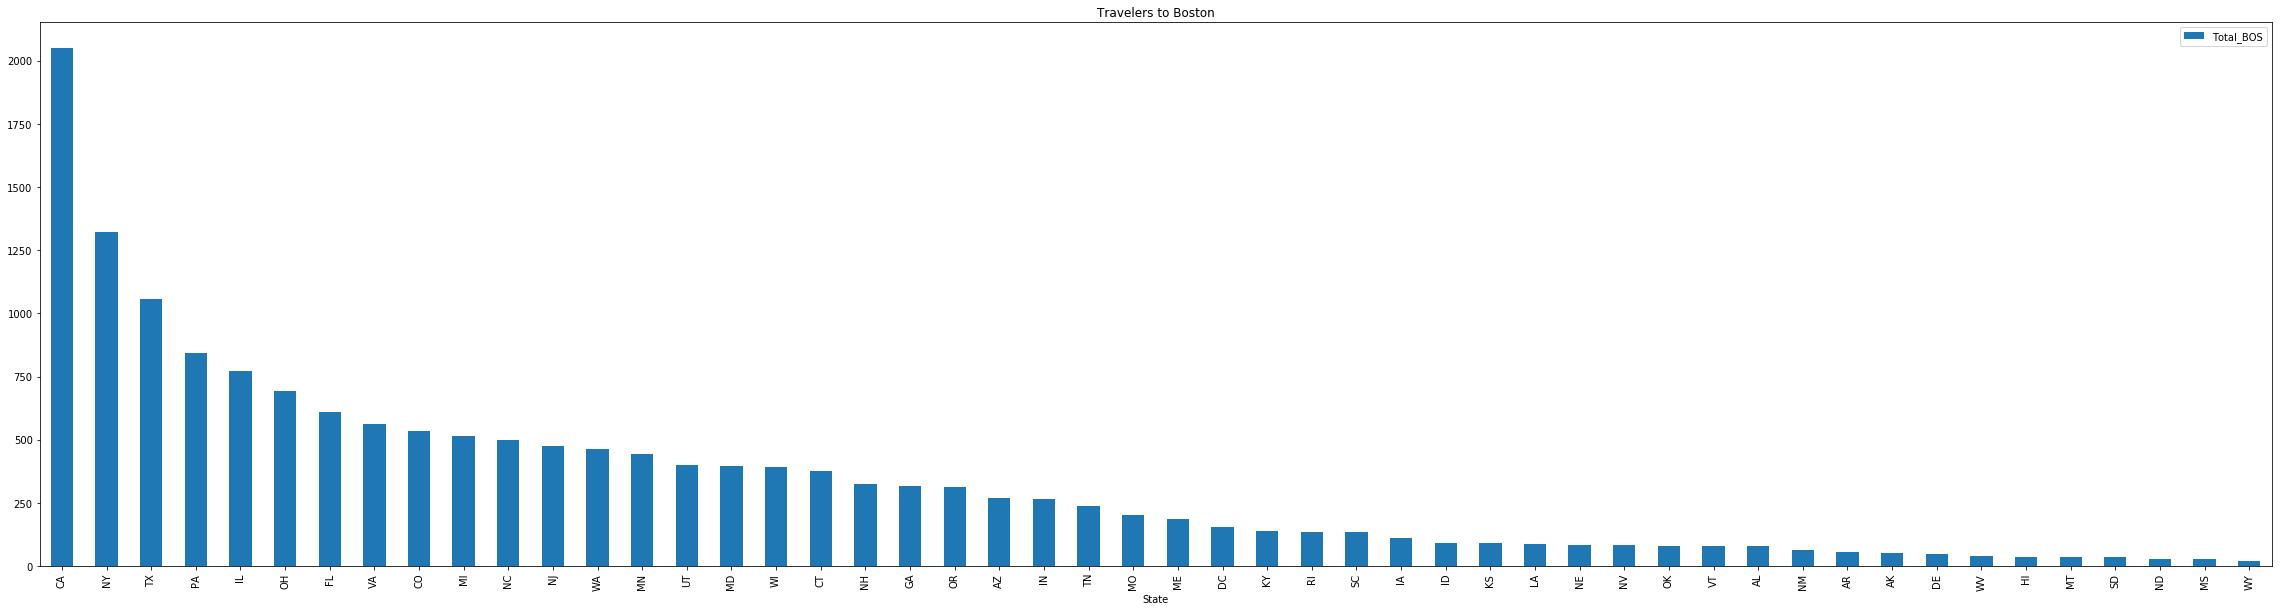

In [350]:
look_at_finishers = all_finishers[['State', 'Total_BOS']]
look_at_finishers = look_at_finishers[look_at_finishers['State'] != 'MA']
look_at_finishers.sort_values(by='Total_BOS',ascending=False).plot(by='State', kind='bar', x='State', figsize=(40,10), title='Travelers to Boston')
plt.savefig("Boston_Finishers_By_State.pdf") 

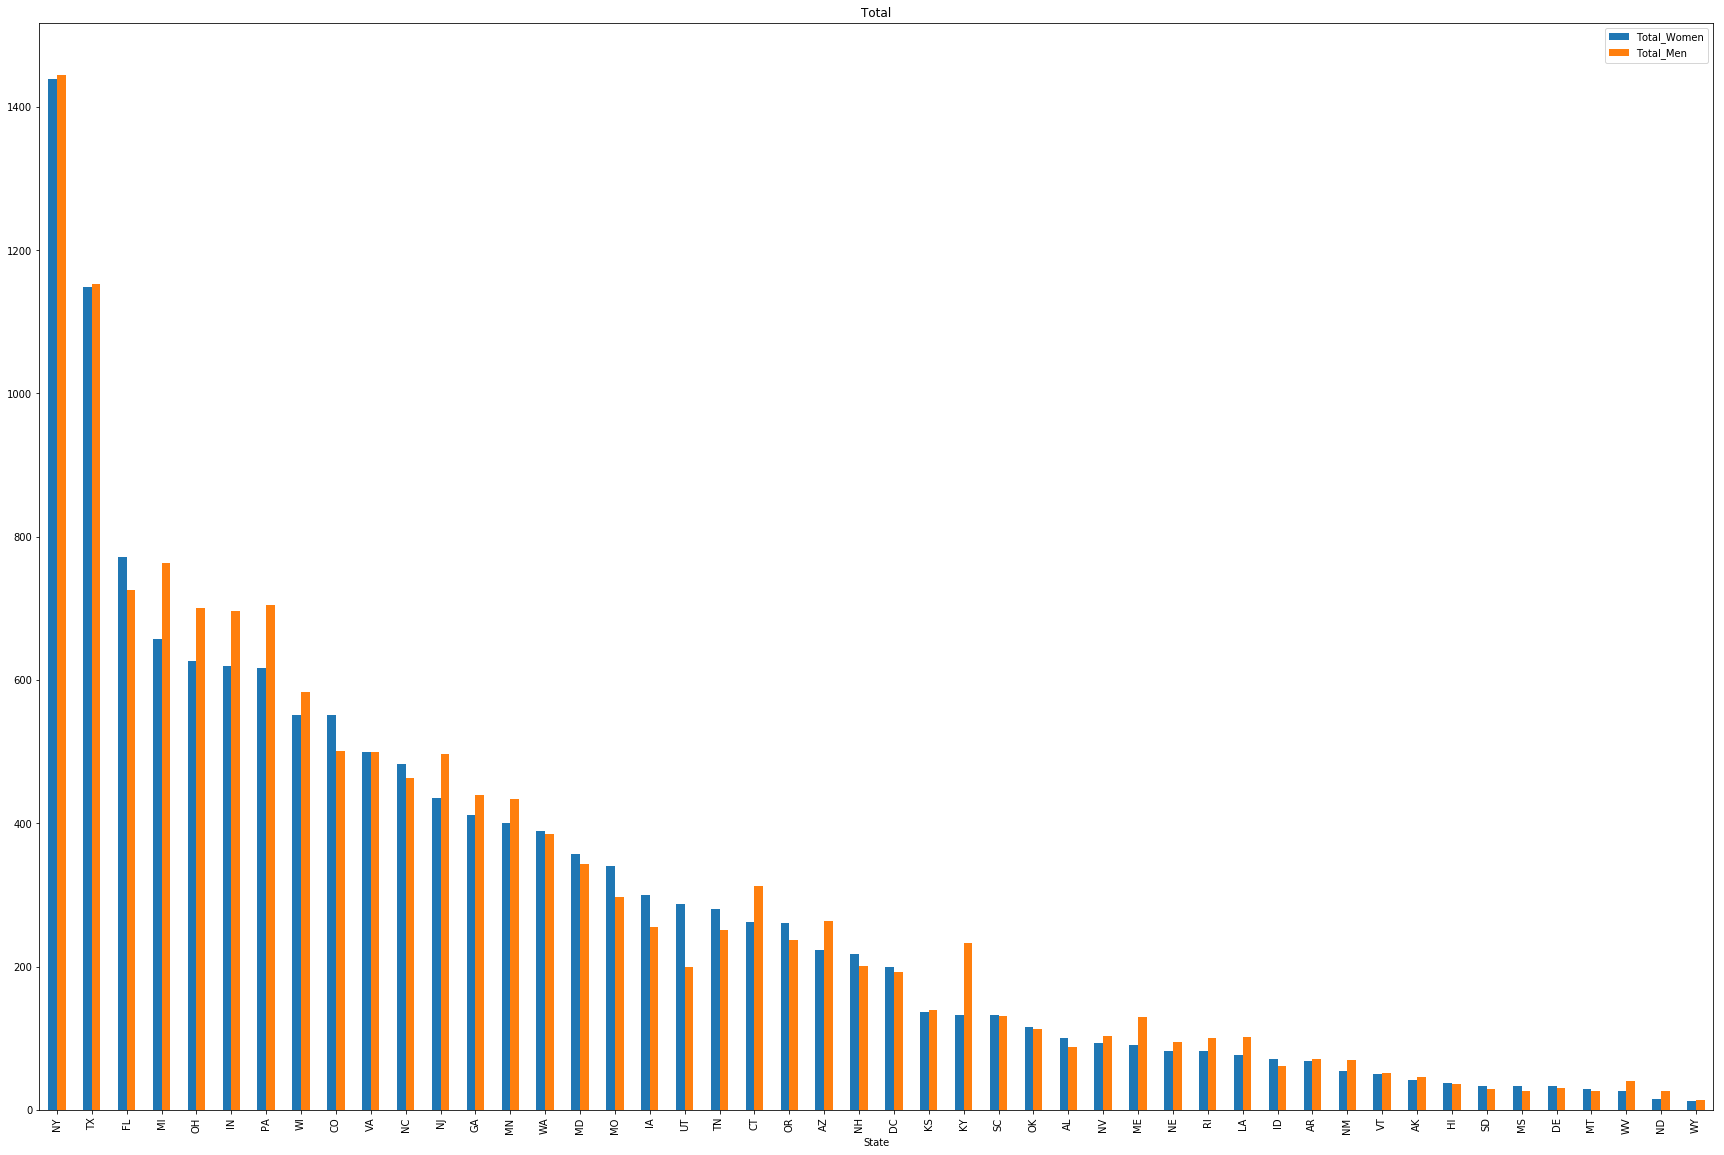

In [573]:
all_travelers = all_finishers[['State','Total_Women','Total_Men']]
all_travelers = all_travelers[all_travelers.State != 'CA']
all_travelers = all_travelers[all_travelers.State != 'MA']
all_travelers = all_travelers[all_travelers.State != 'IL']
all_travelers.sort_values(by='Total_Women',ascending=False).plot(x='State', kind='bar', legend=True, title="Total",figsize=(30,20))
plt.savefig("Out_Of_Staters.pdf") 

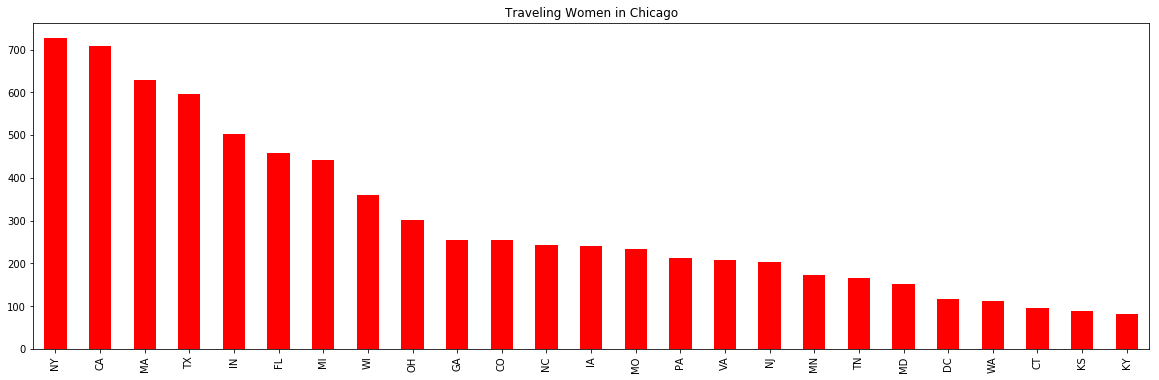

In [303]:
df_chicagowomen_travel = df_chicagowomen_us[df_chicagowomen_us['State'] != 'IL']
df_chicagowomen_travel['State'].value_counts().head(25).plot(kind='bar', title='Traveling Women in Chicago', color='red', figsize=(20,6))

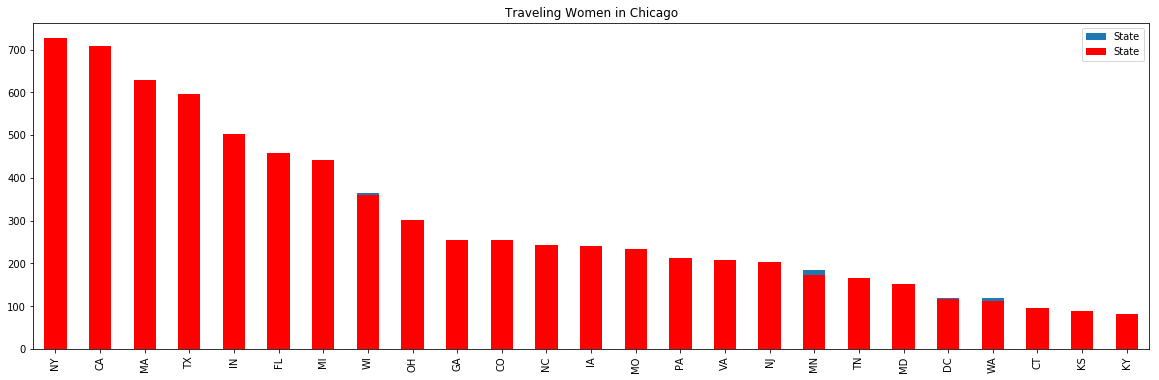

In [319]:
df_chicago_men_travel = df_chicagomen_us[df_chicagomen_us['State'] != "IL"] 
df_chicago_men_travel.shape
ax = df_chicago_men_travel['State'].value_counts().head(25).plot(kind='bar', title='Traveling Men in Chicago', figsize=(20,6), legend=True)
df_chicagowomen_travel['State'].value_counts().head(25).plot(kind='bar', title='Traveling Women in Chicago', color='red', legend=True)

In [501]:
#df_chicagomen['Age'].value_counts().plot(kind='bar',x='Age')


In [605]:
#df_LAmen_int.groupby('State')['Age'].plot(kind='bar')

In [569]:
#runners per capita

In [592]:
percapita= pd.read_csv('Untitled spreadsheet - Sheet4 (1).csv')
percapita

,State,population,men,women,total_runners,/thousandrunners
0,CA,39255000,2049,952,3001,0.076449
1,NY,8538000,1324,641,1965,0.230148
2,TX,2768000,1055,493,1548,0.559249
3,PA,12780000,842,390,1232,0.096401
4,IL,12800000,771,353,1124,0.087813
5,OH,11610000,693,311,1004,0.086477
6,FL,20610000,609,294,903,0.043814
7,VA,8412000,564,281,845,0.100452
8,CO,5541000,534,252,786,0.141852
9,WA,7288000,465,247,712,0.097695


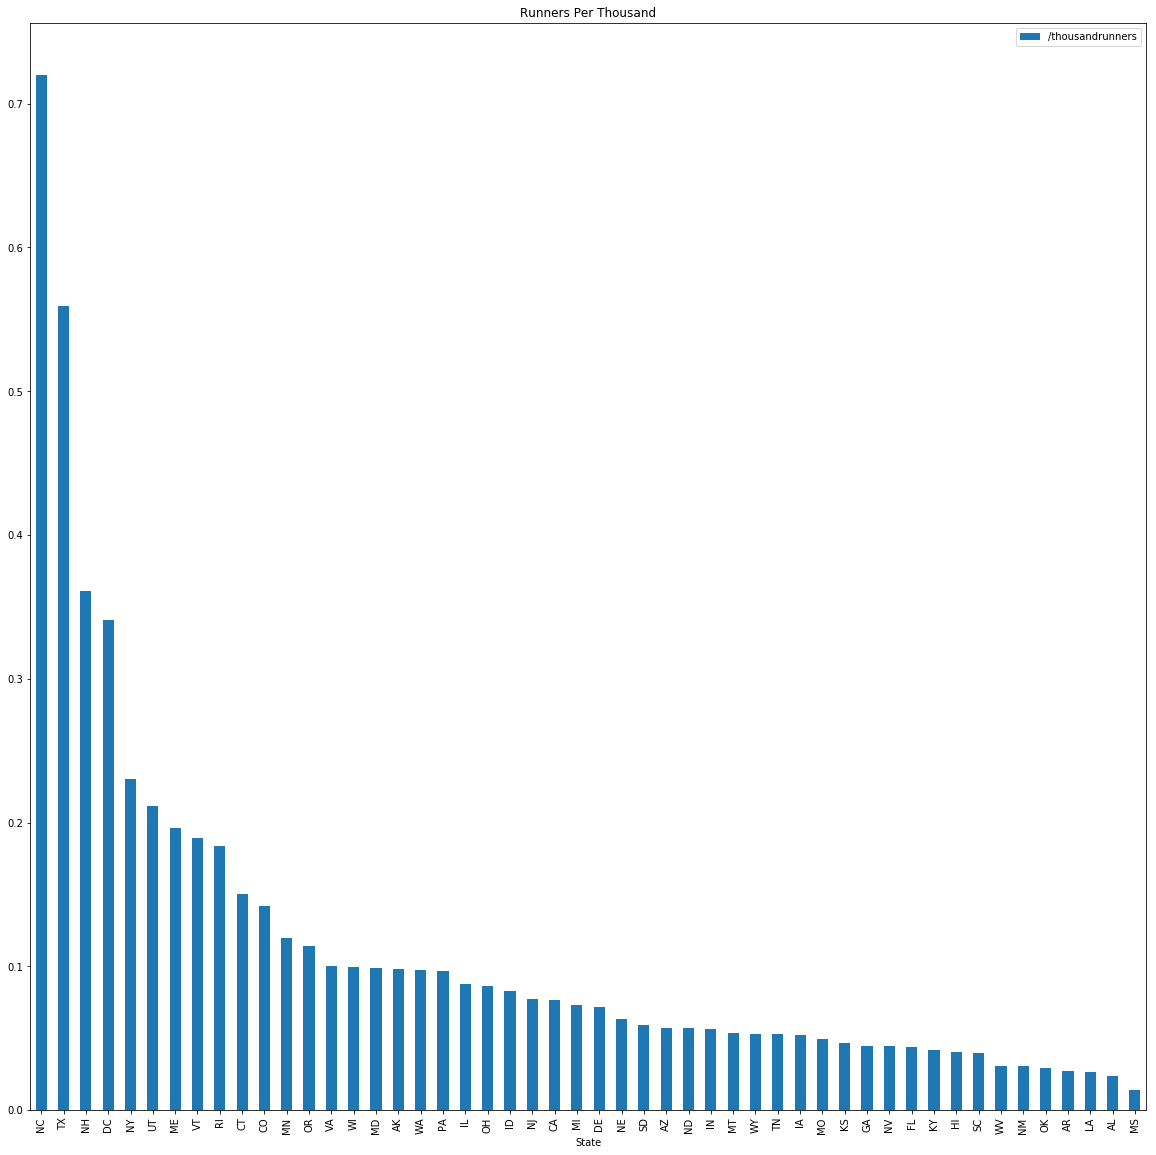

In [603]:
percapita.sort_values(by='/thousandrunners', ascending=False).plot(x="State", y="/thousandrunners", title='Runners Per Thousand', kind='bar', figsize=(20,20))
plt.savefig("First_Image_Boston.pdf")